Career Foundry 6.6 Data Analytics Imersion

1. & 2. Creating the file path and Importing and cleaning the data
3. This section focuses on preparing for time-series 
4. This section is the actual Time-series analysis: decomposition
5. This is testing for stationarity
6. Summary
7.  Additional / bonus task
7.1 Defining specific Parameters
7.2 Splitting the data
7.3 Running and Fitting the Model
7.3.1 Defining Parameters again
7.3.2 Splitting up the data again
7.3.3 Running and fitting the particular model

In [ ]:
# ***Note: double check import for potential error with quandl

In [6]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
import quandl

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'quandl'

In [11]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2.  This is creating the file path and  Importing the Cleaned Data

In [12]:
# This code is  creating the file path
path = r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\chocolate_bar_ratings_cleaned5.csv'

In [14]:
# importing the file that was from 6.4 part 3 ***Note: the name from choc_bar_ratings_df_clean6 was 
# because the data was again cleaned and re-saved in the last jupyter notebook
choc_bar_ratings_df_clean5= pd.read_csv(r'C:\Users\rdpor\anaconda3\Scripts\CAREER FOUNDRY ACHIEVMENT 6\Prepared Data\choc_bar_ratings_df_clean5.csv')

In [15]:
# assessing the data frame
choc_bar_ratings_df_clean5.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",0,3,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",0,3,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",0,3,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",0,3,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,0,0,Mid-level


In [16]:
#assessing the data frame
choc_bar_ratings_df_clean5.shape

(2657, 13)

# 3. This is preparing for the time series

In [17]:
# What this code is doing is reviewing the 'Review Date' column with the value counts function
choc_bar_ratings_df_clean5['Review Date'].value_counts().sort_index(ascending=False)

2023.0     29
2022.0     98
2021.0    175
2020.0     81
2019.0    193
2018.0    228
2017.0    105
2016.0    217
2015.0    284
2014.0    247
2013.0    183
2012.0    193
2011.0    163
2010.0    110
2009.0    123
2008.0     92
2007.0     73
2006.0     62
Name: Review Date, dtype: int64

In [18]:
# What this code is doing is reviewing the 'Rating' column with the value counts function 
choc_bar_ratings_df_clean5['Rating'].value_counts().sort_index(ascending=False)

4.00    115
3.75    312
3.50    605
3.25    487
3.00    552
2.75    345
2.50    173
2.25     17
2.00     33
1.75      3
1.50     10
1.00      4
0.00      1
Name: Rating, dtype: int64

In [19]:
# What this code is doing is reviewing 'Company Location' with the value counts function
choc_bar_ratings_df_clean5['Company Location'].value_counts()

U.S.A.        1207
Canada         185
France         184
U.K.           135
Italy           86
              ... 
Martinique       1
Reunion          1
Ghana            1
Suriname         1
Wales            1
Name: Company Location, Length: 66, dtype: int64

The next thing that will happen here is various things.  First, there will be a time 
series data analysis.  This will be done by utilizing the average yearly ratings 
in the United States of America.  I decided to go with the United States of America because
of the potential high volume of data and therefore answers. 

In [84]:
# choc_bar_ratings_df_clean5 # flin 10 ***Note: this is a very important cell, it's creating a new data frame
# focused just on the USA ratings, however with further analysis in the 
# future it would be facinating to look at other countries

# Creating a new data frame specifically for finding average ratings per year for USA 
ratings_USA_df = choc_bar_ratings_df_clean5.loc[(choc_bar_ratings_df_clean5['Company Location']== 'U.S.A.')]

In [21]:
# assessing the new data frame head / assessing the situation
ratings_USA_df.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Num_of_Ingredients,Specific Ingredients,Cocoa Level,Ingredient Level,Rating Level
0,Manoa,U.S.A.,2012.0,Liberia,"Liberia, batch 174",0.76,"molassses, intense, off, herb",3.25,3,"B,S,C",0,3,Mid-level
1,Manoa,U.S.A.,2012.0,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.76,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",0,3,Mid-level
2,Manoa,U.S.A.,2012.0,Peru,"Piura, batch 173",0.76,"banana, menthol, medicinal",3.00,3,"B,S,C",0,3,Mid-level
3,Manoa,U.S.A.,2012.0,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.68,"molasses, sweet, cocoa",3.25,3,"B,S,C",0,3,Mid-level
4,Nanea,U.S.A.,2013.0,U.S.A.,Criollo Blend,0.72,"sandy, spicy, earthy",3.50,0,NaN,0,0,Mid-level


In [86]:
ratings_USA_df['Review Date'].dtype

  

dtype('float64')

In [87]:
 #This particular code is changing the data for review date from a float to an integer
ratings_USA_df['Review Date'] = ratings_USA_df['Review Date'].astype(int)

In [88]:
# ***Note: flin 13 very important this is a new data frame
# this is grouping by the review date and rating with the new data frame df_USA_mean_r
df_USA_mean_r = ratings_USA_df.groupby(['Review Date'])['Rating'].mean().reset_index()


In [89]:
df_USA_mean_r

,Review Date,Rating
0,2006,2.807692
1,2007,3.017241
2,2008,2.931818
3,2009,3.200000
4,2010,3.121622
5,2011,3.151515
6,2012,3.114362
7,2013,3.146341
8,2014,3.175847
9,2015,3.211149


In [90]:
# assessing the shape
df_USA_mean_r.shape

(18, 2)

In [91]:
# assessing the columns
df_USA_mean_r.columns

Index(['Review Date', 'Rating'], dtype='object')

In [92]:
type(df_USA_mean_r)

pandas.core.frame.DataFrame

In [93]:
# ***Note fix error needed
# This code  is plotting the data using matplotlib.

plt.figure(figsize=(15, 5), dpi=100)

# What this particular code is doing is specifying the x and y values for the plot. 
plt.plot(USA_annual_mean_rating['Review Date'], USA_annual_mean_rating['Rating'], marker='o')

# What this particular code is doing is adding labels and a title. 
plt.xlabel('Review Date')
plt.ylabel('Average Rating')
plt.title('Average Rating Per Year for Chocolate Bars that are made in the USA')

# This code below is displaying the plot. 
plt.show()

NameError: name 'USA_annual_mean_rating' is not defined

<Figure size 1500x500 with 0 Axes>

# 4 This section is the Time-Series analysis particularly the decomposition

In [32]:
# This code is resetting index to use the "Review Date" column as a filter
df_USA_mean_r2 = df_USA_mean_r.reset_index(drop=True).set_index("Review Date")

In [33]:
df_USA_mean_r2.head()
# this is checking the head of the new data frame

,Rating
Review Date,
2006,2.807692
2007,3.017241
2008,2.931818
2009,3.200000
2010,3.121622


In [34]:
df_USA_mean_r2.shape

(18, 1)

In [35]:
df_USA_mean_r2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 2006 to 2023
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


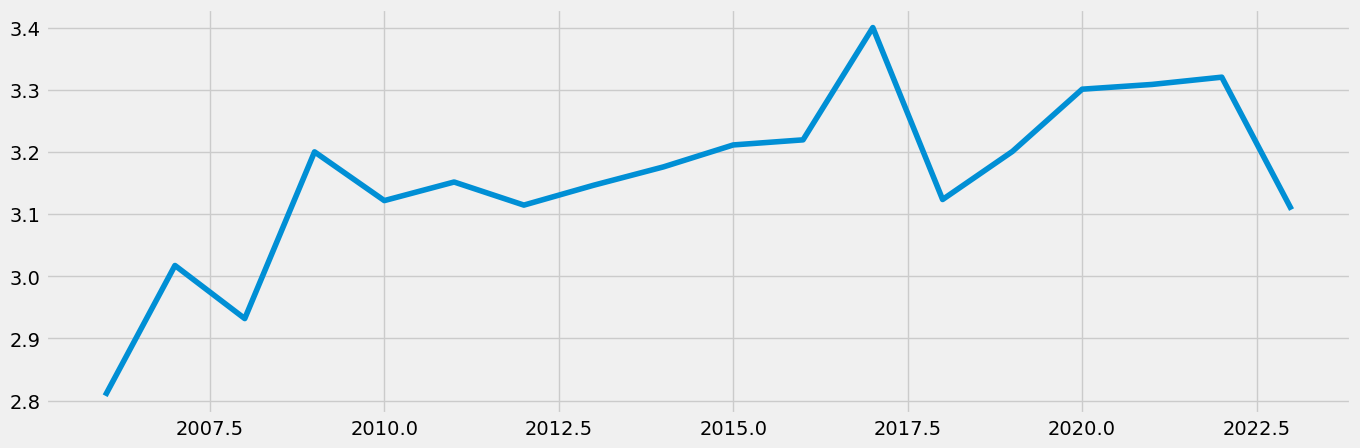

In [36]:
# This code is confirming the new data set, df_USA_mean_r2, and making the plot

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_USA_mean_r2)

In [37]:
# What this code is doing is checking for missing values, Note: there aren't any #flin 24

df_USA_mean_r2.isnull().sum()

Rating    0
dtype: int64

In [39]:
# Checking for duplicates

dups = df_USA_mean_r2.duplicated()
dups.sum()

0

In [ ]:
#  ***  Note df_USA_mean_r2 = USA_amr2

In [42]:
# This is ensuring that the "Review Date" column is the correct datetime format
df_USA_mean_r2.index = pd.to_datetime(df_USA_mean_r2.index)

# this is innfering the frequency of the index
freq = pd.infer_freq(df_USA_mean_r2.index)

# This is setting the frequency explicitly if it's not inferred
if freq is None:
    freq = 'AS' 

# This is creating a new datetime index with the correct years
years_range = range(2006, 2024)  # Assuming the range of years in your data
df_USA_mean_r2.index = pd.to_datetime(years_range, format='%Y')

# This is checking the DataFrame information
df_USA_mean_r2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2006-01-01 to 2023-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes


In [44]:
# What this does is ecompose the time series using an additive model
Decomposition = sm.tsa.seasonal_decompose(df_USA_mean_r2, model='additive', period=1)

In [45]:
# What This will do is  define a fixed size for all special charts.
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

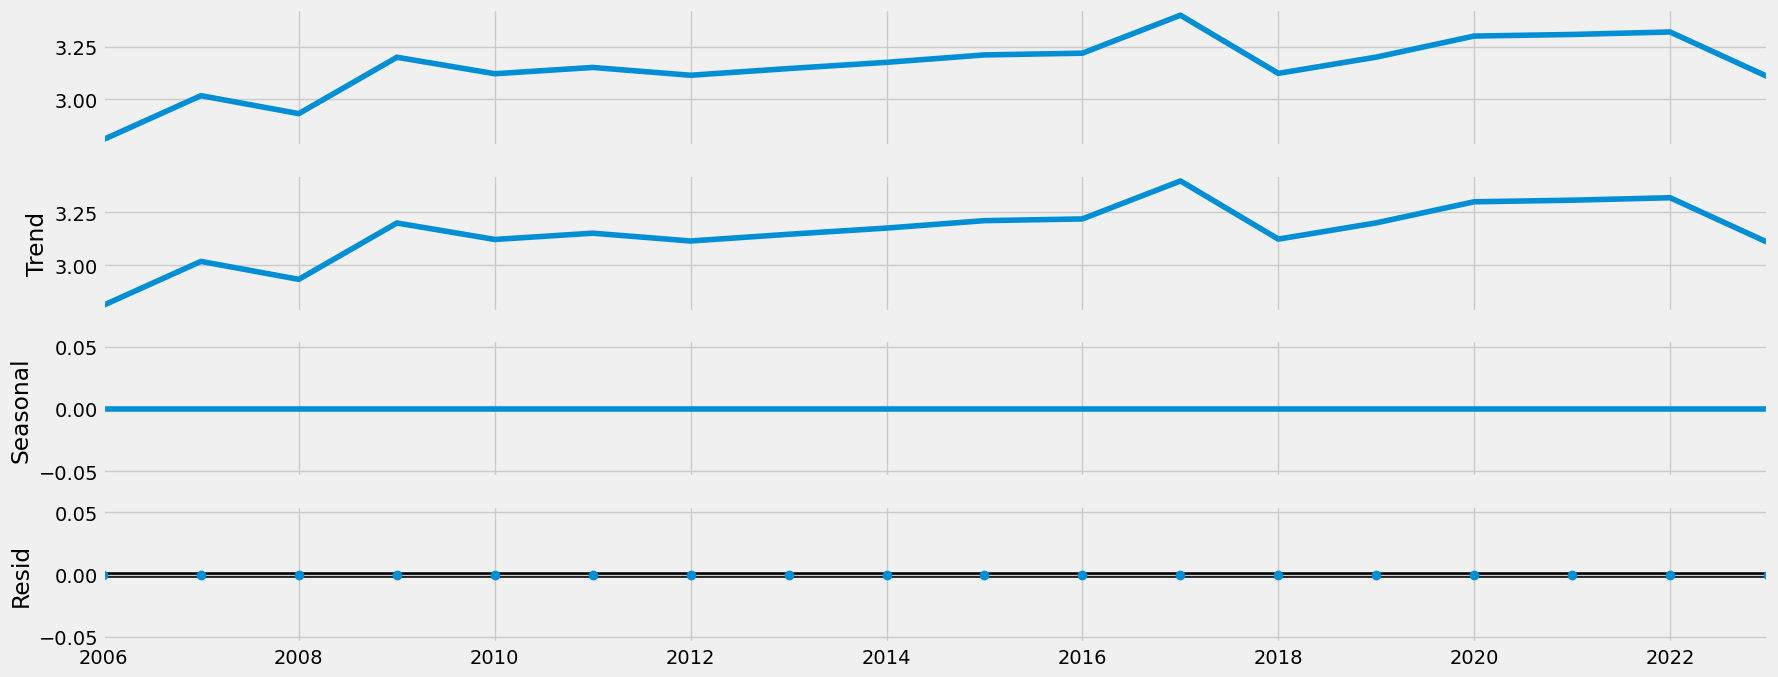

In [47]:
# What this will do is plot the separate components needed 

Decomposition.plot()
plt.show()

What's going on here is a variety of things.  In the decomposition plot, it's visually apparent that the observed data and the trend line closely are in alignment. However, the seasonality is represented by straight lines, and the residual line looks to be empty. This suggests that the current decomposition plot perhaps is not effectively capturing certain aspects of the data. To gain a more comprehensive understanding and validate the stationarity of the time series, it might be beneficial to conduct stationarity tests. These tests can provide insights into whether the observed patterns, such as trends and seasonality, are consistent and are able to help out with refining the decomposition model for a more accurate representation of the underlying structure in the time series data.

# 5.  This section Tests for stationarity

In [51]:
# What is happening here is that the adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array which is vitally important.

from statsmodels.tsa.stattools import adfuller 
# Importing the adfuller() function

def dickey_fuller(timeseries): 
    # This is Defining the function
    # Performing the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# What this code is doing is apply the test using the function on the time series
dickey_fuller(df_USA_mean_r2['Rating'])

Dickey-Fuller Stationarity test:
Test Statistic                -20.991456
p-value                         0.000000
Number of Lags Used             7.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


There's various things that are going on here.  First, the test statistic obtained is significantly smaller than any of the critical values, yielding a p-value of zero. Based on these statistical measures, there is compelling evidence to reject the null hypothesis, which helps put into place the presence of a unit root. In simpler terms, the data can be deemed stationary.
To further bolster our assessment, the next thing to do will be to  examine the autocorrelation plot.

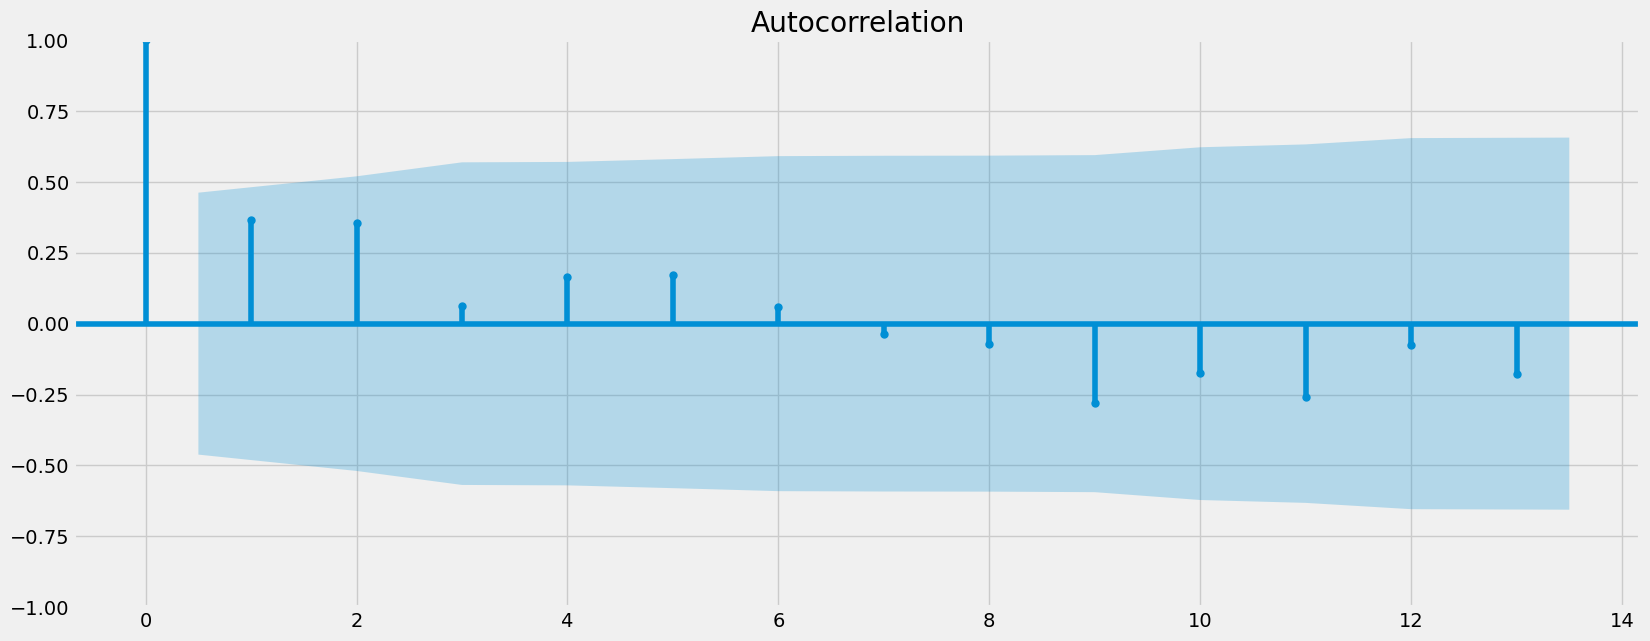

In [55]:
# This code visually represents how each value 
# in the time series is correlated with its past values at various
# time lags. This plot is able to  provide insights into potential patterns,
# trends, or seasonality in the data, aiding in the analysis of temporal dependencies.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_USA_mean_r2)
plt.show()

The above code and plot mean different things.  The autocorrelation plot shows that a single line extending beyond the blue confidence level.  What this potentially suggests is that the lags in the time series data are minimal or statistically insignificant, and indicates a low degree of correlation. In more simpler terms, the limited presence of lines above the confidence level means that successive observations in the series are not strongly correlated, indicating a potential lack of pronounced temporal patterns or dependencies all of which are very important to the overall analysis.

# 6. Summary 
There are various significant things that occur in this analysis.  In each analysis, it becomes evident that various factors, including the time of tasting, do not show a lasing and direct impact on the ratings of chocolate bars. This underscores the subjective nature of taste, as experienced by different participants, and raises awareness of potential biases in data collection and measurement.
That being said, a notable observation emerges: in the dataset, there was a significant increase in the average yearly rating for U.S.A. chocolate bars around 2017, reaching its highest level at 3.4. This incurages further exploration into the reasons behind this increase. Subsequent analyses could delve into specific things such as: manufacturers, types of beans, individual ingredients, and 'most memorable characteristics.' This approach aims to reveal the key elements contributing to a highly-rated chocolate bar.
The pursuit of understanding what makes a chocolate bar highly-rated not only involves data analysis but also invites the joyful sensory experience of tasting. The combination of both quantitative and qualitative exploration creates a more conduce environment for a more holistic and insightful investigation into the world of chocolate appreciation.  Overall it's exciting to see how the quantitative and qualitative data can be analyzed so that chocolate lovers world wide can have a more meaningful holistic chocolate tasting experience.


# 7. Bonus Task
7.1 Defining Parameters

In [64]:
# ***Note: very important
df_diff_data =df_USA_mean_r2 - df_USA_mean_r2.shift(1)
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)


In [65]:
df_diff_data.dropna(inplace = True)
df_diff_data.head()

,Rating
2007-01-01,0.209549
2008-01-01,-0.085423
2009-01-01,0.268182
2010-01-01,-0.078378
2011-01-01,0.029894


<Figure size 500x500 with 0 Axes>

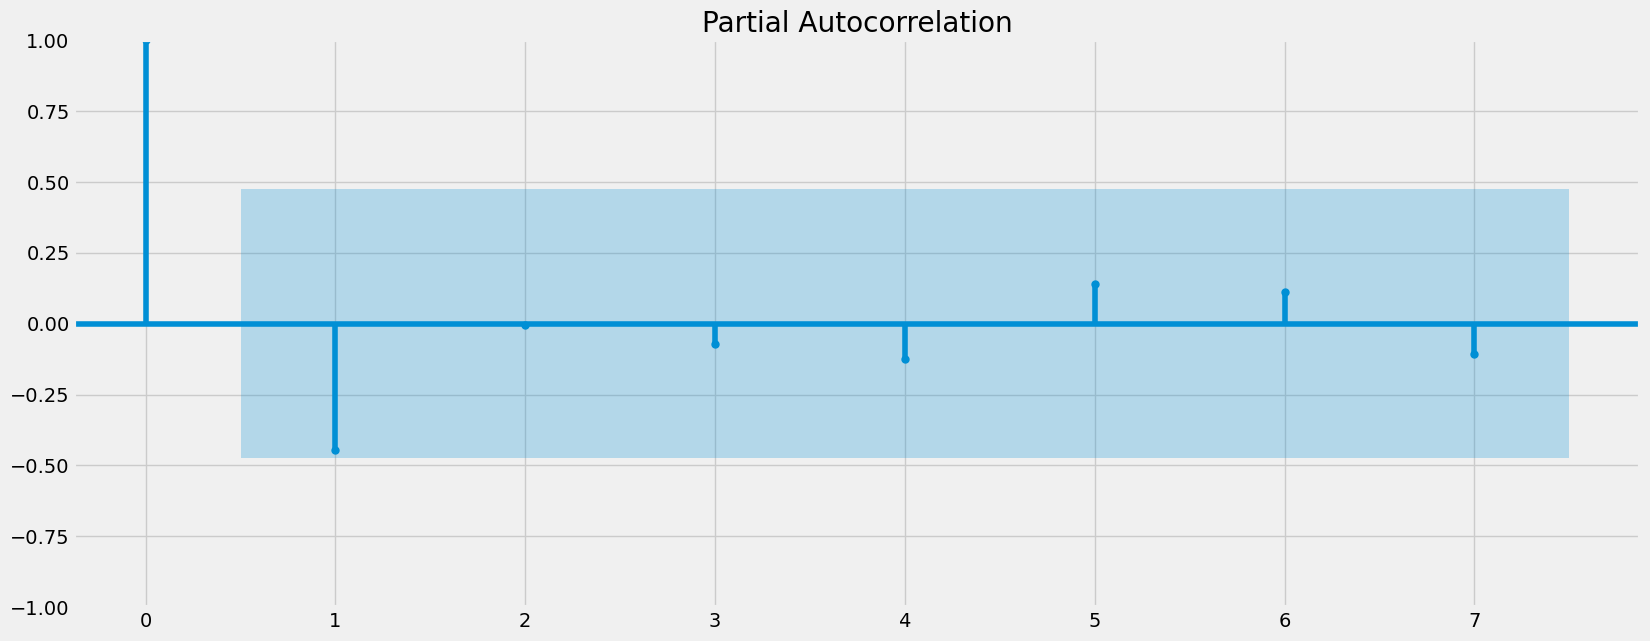

In [66]:
# What this code is doing is plotting partial autocorrelations to determine parameter p
plt.figure(figsize=(5,5), dpi=100)
plot_pacf(df_diff_data, lags=7)
plt.show()

In [ ]:
df_diff_data

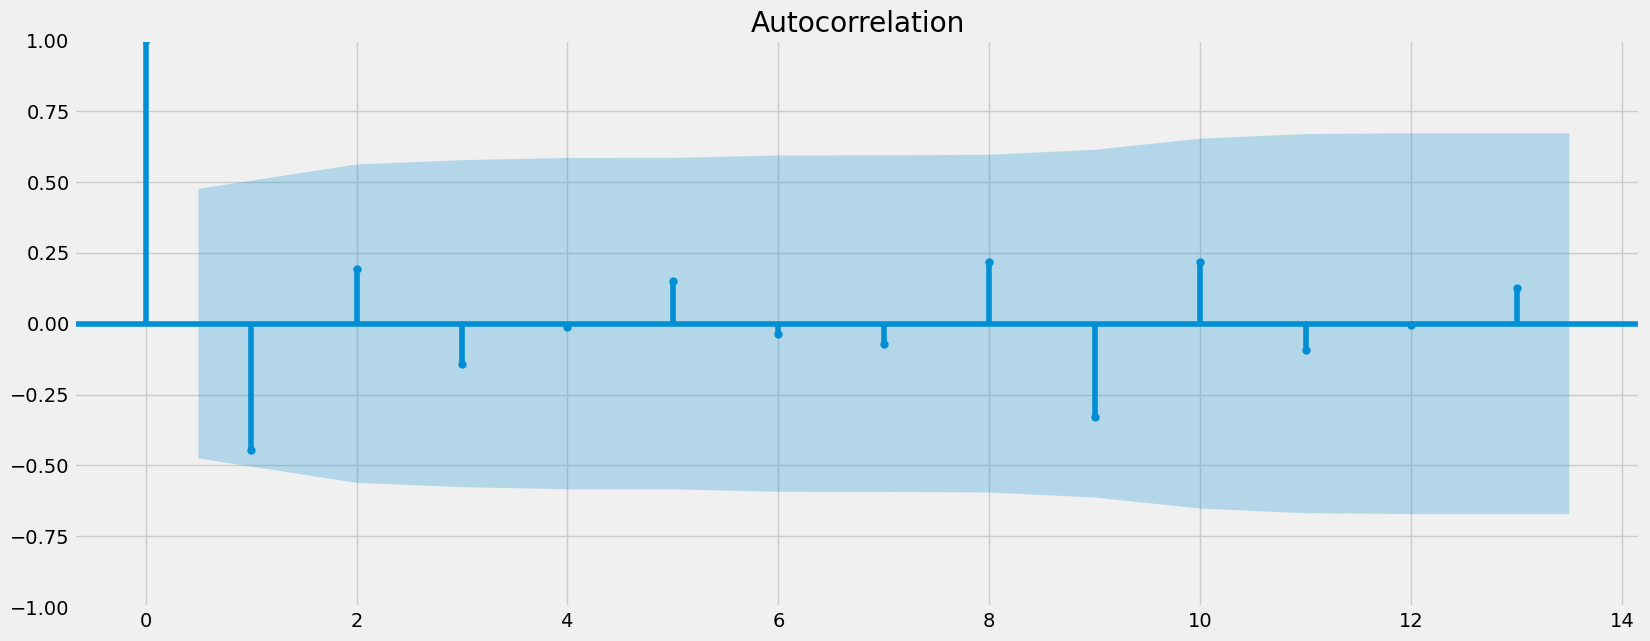

<Figure size 1500x500 with 0 Axes>

In [67]:
# What this code is doing is plotting autocorrelations to determine parameter q
plot_acf(df_diff_data)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

Though there are various options which could be worth exploring, for now I will go with MA=3' and AR=3. 

# 7.2  This section is Splitting the data

In [68]:
# What this code is doing is splitting the data into train and test

train = df_diff_data['Rating'][:13]
test = df_diff_data['Rating'][12:]

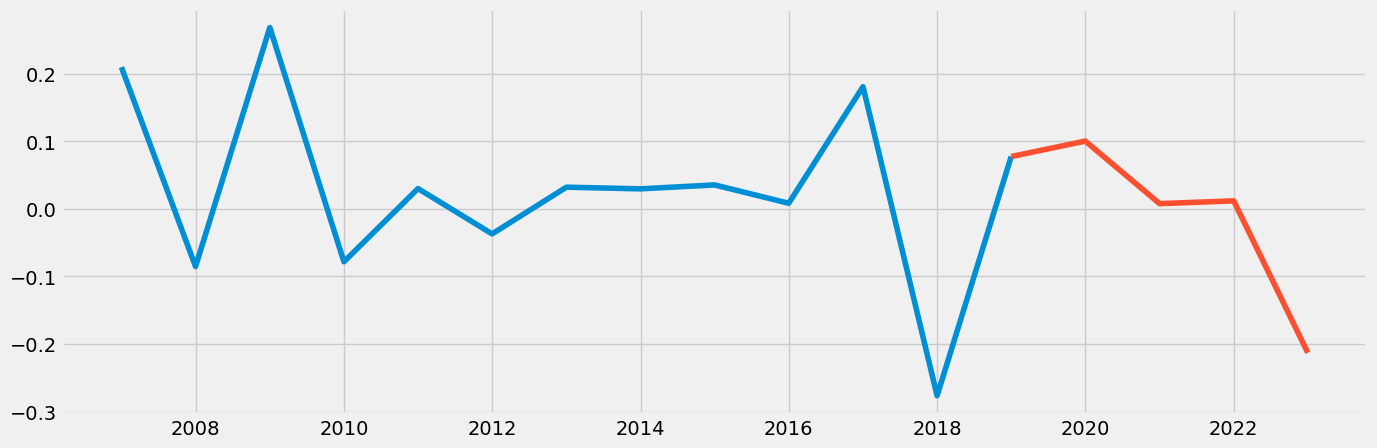

In [69]:
# This code below is plotting both sets in order to see the split
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [70]:
# This code belowing is testing the shape of the 'test' plot
test.shape

(5,)

# 7.3 This section is  Running and Fitting the Model

In [72]:
# What this code is doing is mporting the  ARIMA model
from statsmodels.tsa.api import ARIMA

                               SARIMAX Results                                
Dep. Variable:                 Rating   No. Observations:                   13
Model:                 ARIMA(3, 1, 3)   Log Likelihood                   8.665
Date:                Tue, 19 Dec 2023   AIC                             -3.330
Time:                        11:07:03   BIC                              0.065
Sample:                    01-01-2007   HQIC                            -4.586
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4245      0.853     -0.498      0.619      -2.096       1.246
ar.L2          0.9949      0.289      3.440      0.001       0.428       1.562
ar.L3          0.4202      0.844      0.498      0.6

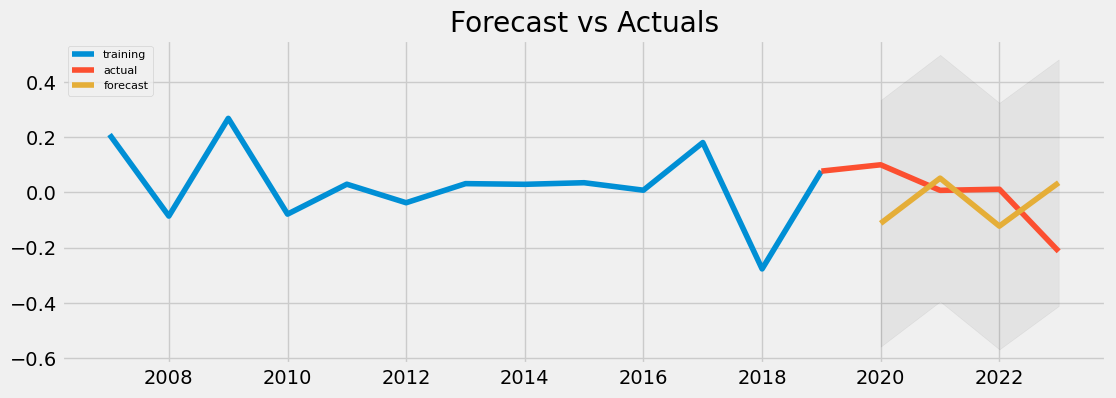

In [74]:
# What this code is doing is Replacing the p, d, and q with appropriate values
model = ARIMA(train, order=(3,1,3))  
fitted = model.fit()
print(fitted.summary())

# What this code is doing is orecasting 
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# This is computing standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# This is computing confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# this is creating forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# This is creating the necessary plot
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Note: There's interesting findings regard the coefficients.  There aren't any coefficients that are statistically significant (p<= 0.05).  Also the forecast is the confidence range but does not look different from the actual values. 

                               SARIMAX Results                                
Dep. Variable:                 Rating   No. Observations:                   13
Model:                 ARIMA(2, 1, 2)   Log Likelihood                   8.378
Date:                Tue, 19 Dec 2023   AIC                             -6.756
Time:                        11:18:49   BIC                             -4.332
Sample:                    01-01-2007   HQIC                            -7.654
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4188      1.011     -1.404      0.160      -3.399       0.562
ar.L2         -0.4193      0.895     -0.468      0.640      -2.174       1.336
ma.L1          0.2507      3.705      0.068      0.9

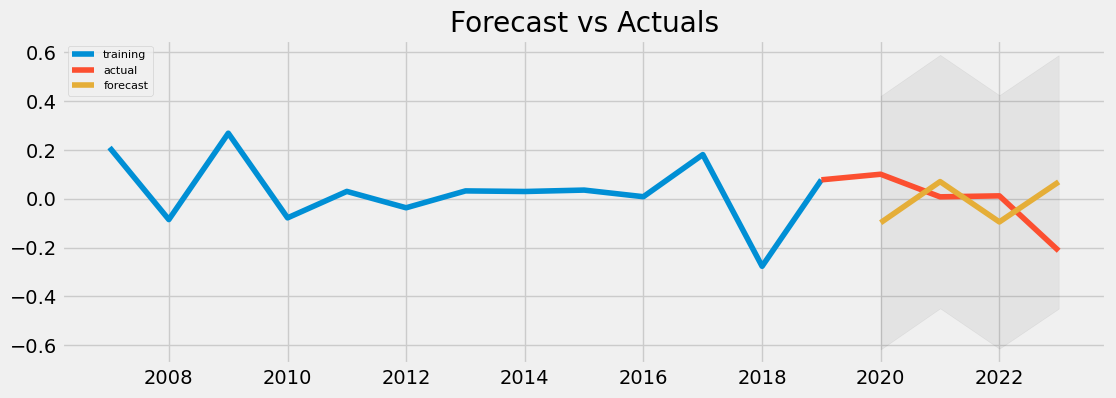

In [76]:
#  Please Note: this is the 2nd iteration
model = ARIMA(train, order=(2,1,2))  # Replace p, d, and q with appropriate values
fitted = model.fit()
print(fitted.summary())

# This code below is computing standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# Compute confidence interval
conf = 1.96 * se  # 95% confidence interval (for a two-sided interval)

# This code below is forecasting
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# This code below is forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)

# This code below is plotting 
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

There's various things going on here.  To sum it up, the (2,1,2) and the coefficients are not close to being statistically significant, however they are slightly more in line with the specific results of 7.3.1. 

This is running tests again

In [78]:
# This is running tests a second time
df_diff_data2 = df_diff_data - df_diff_data.shift(1)

In [79]:
df_diff_data2.dropna(inplace = True)
df_diff_data2.head()

,Rating
2008-01-01,-0.294972
2009-01-01,0.353605
2010-01-01,-0.346560
2011-01-01,0.108272
2012-01-01,-0.067047


<Figure size 500x500 with 0 Axes>

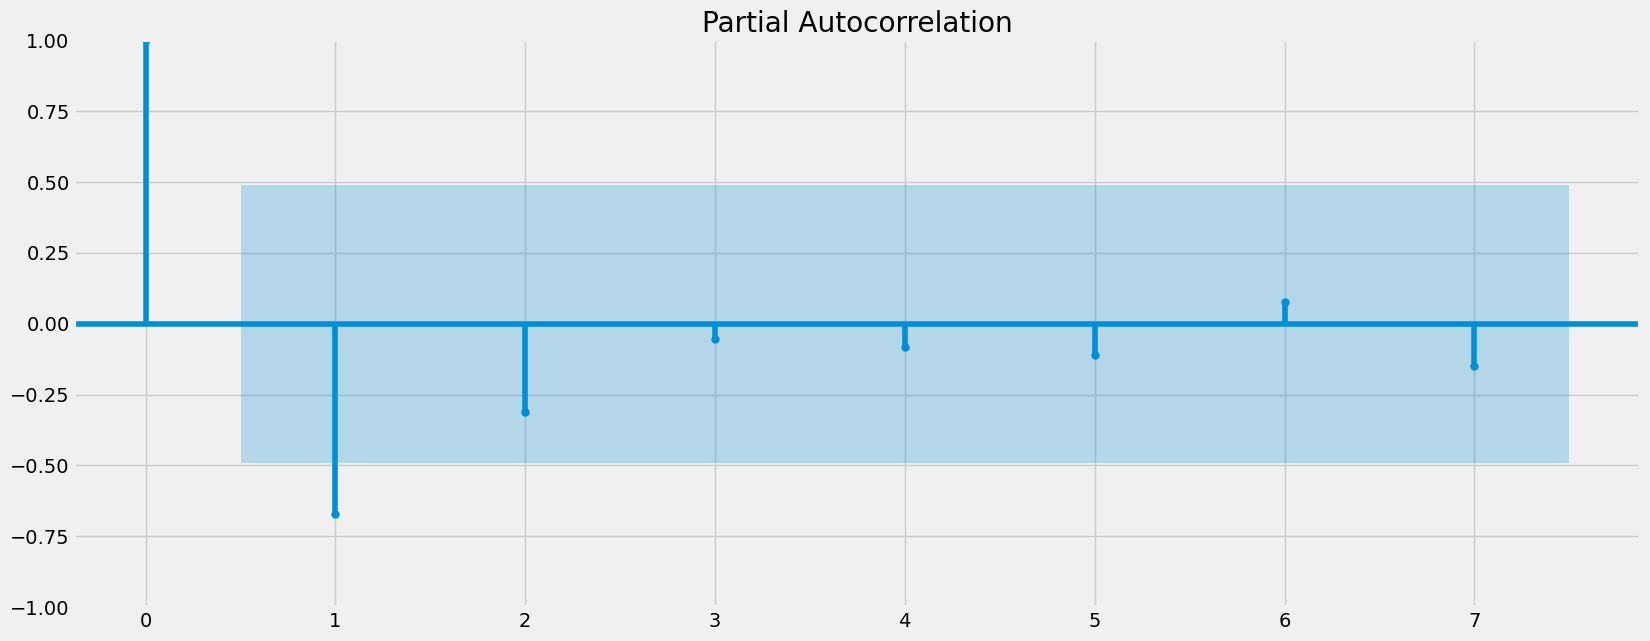

In [124]:
# What this code below is doing is making a  partial autocorrelations to determine parameter p
plt.figure(figsize=(5,5), dpi=100)
plot_pacf(df_diff_data2, lags=7)
plt.show()

Here are some differences from the first test

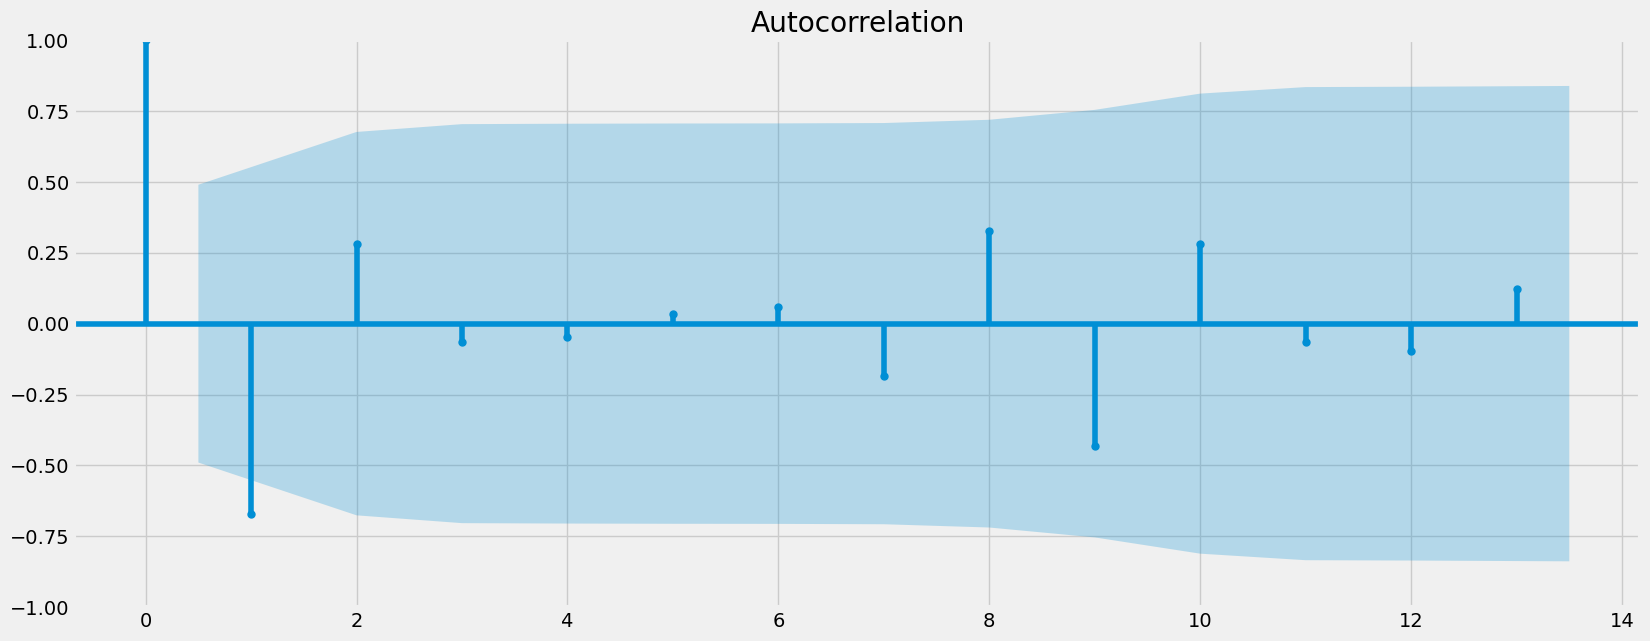

<Figure size 1500x500 with 0 Axes>

In [80]:
# This code is plotting autocorrelations to determine parameter q
plot_acf(df_diff_data2)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

Some difference, again, from the first acf data_diff test.¶
7.3.2 Splitting the data again

In [81]:
# What this code is doing is seperating the data.
train = df_diff_data2['Rating'][:13]
test = df_diff_data2['Rating'][12:]

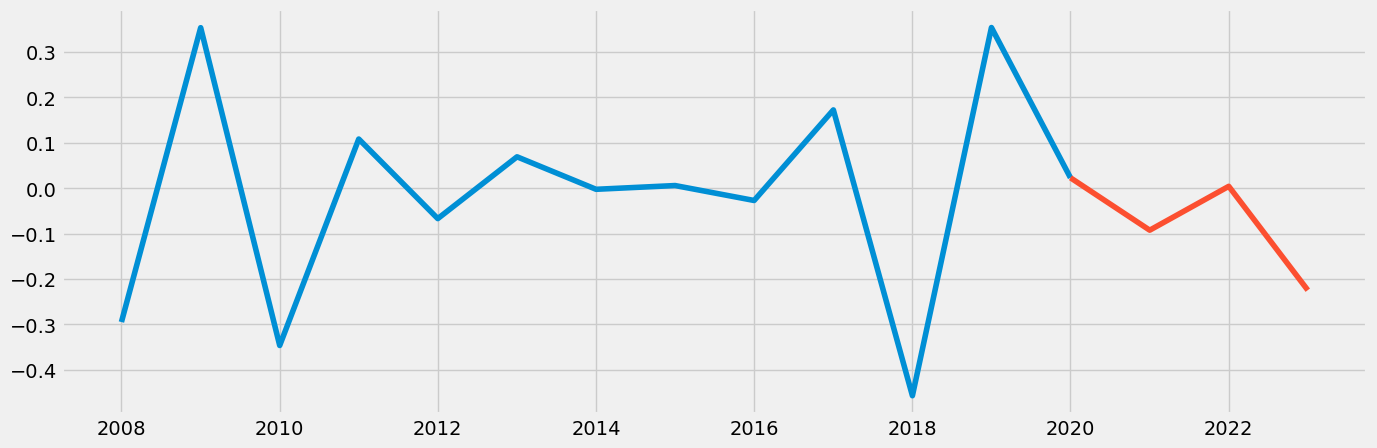

In [82]:
# What this code is doing is plotting both sets in order to see the different seperation. 
plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

7.3.3 This is running and fitting the mode

                               SARIMAX Results                                
Dep. Variable:                 Rating   No. Observations:                   13
Model:                 ARIMA(4, 2, 4)   Log Likelihood                   0.671
Date:                Tue, 19 Dec 2023   AIC                             16.657
Time:                        11:25:09   BIC                             20.238
Sample:                    01-01-2008   HQIC                            14.400
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7789      2.716     -0.655      0.512      -7.101       3.544
ar.L2         -2.2265      3.461     -0.643      0.520      -9.010       4.557
ar.L3         -1.5379      2.880     -0.534      0.5

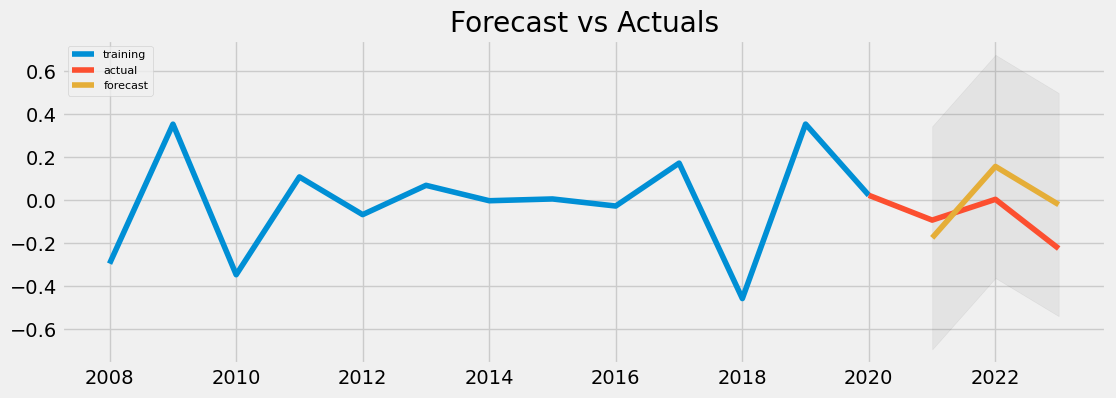

In [83]:
# Replacing p, d, and q with appropriate values
model = ARIMA(train, order=(4,2,4)) 
fitted = model.fit()
print(fitted.summary())

# This particular code below is forecasting
forecast_steps = len(test)
fc = fitted.forecast(steps=forecast_steps, alpha=0.05)  # Forecasted values

# This particular code is computing  the standard errors
se = np.sqrt(fitted.forecast(steps=forecast_steps, alpha=0.05)[1])  # Standard errors

# This code below is creating forecasted and confidence interval series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(fc - conf, index=test.index)
upper_series = pd.Series(fc + conf, index=test.index)


# what this code is doing is computing confidence interval  # 95% confidence interval (for a two-sided interval)
conf = 1.96 * se 

# This below is running the plot needed 
plt.figure(figsize=(12, 4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

There's various iterations and various data.  Ultimately it appears that this forecast is somewhat similar to the actual results.  